In [47]:
from os import listdir
import os
import cv2
import numpy as np
from skimage.util import random_noise
from imutils import grab_contours
import copy
import matplotlib.pyplot as plt

In [48]:
# # Load image
# image = cv2.imread("character_image/9/9_01.jpg")
# resized = cv2.resize(image, (28,28))
# # convert picture to gray scale
# img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
# # _,img = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
# x_flattend = img_gray.reshape(1, 28*28)
# # plt.matshow(img_gray)
# x_flattend = np.squeeze(x_flattend)
# x_flattend = x_flattend/255
# inputs  = x_flattend

In [49]:

# bias_j = np.random.uniform(0, 1, size=(HIDDEN_NEURONS,1))
# bias_j
# bias_k = np.random.uniform(0, 1, size=(HIDDEN_NEURONS))
# bias_k

In [59]:
import numpy as np
import math

OUTPUT_NEURONS = 20
INPUT_NEURONS = 28* 28
HIDDEN_NEURONS = 16

def Weight_Initialization():
    # Initializing of the Weights. Random float number between -0.5 to 0.5 for weights.
    np.random.seed(1)
    inputs= np.random.uniform(-0.5, 0.5, size=(INPUT_NEURONS))
    wji= np.random.uniform(-0.5, 0.5, size=(HIDDEN_NEURONS, INPUT_NEURONS))
    wkj = np.random.uniform(-0.5, 0.5, size=(OUTPUT_NEURONS, HIDDEN_NEURONS))
    bias_j = np.random.uniform(0, 1, size=(HIDDEN_NEURONS))
    bias_k = np.random.uniform(0, 1, size=(OUTPUT_NEURONS))
    targets = np.random.uniform(0, 1, size=(OUTPUT_NEURONS))
    return  wji,wkj,bias_j,bias_k

# def Read_Files():
#     # Reading of Segmented Training Files, and Target Files.
def Forward_Input_Hidden(inputs,wji, bias_j):
    # Forward Propagation from Input -> Hidden Layer.
    # Obtain the results at each neuron in the hidden layer.
    # Calculate 𝑁𝑒𝑡𝑗and 𝑂𝑢𝑡𝑗
    
    Netj = np.dot(inputs,wji.T) 
    # print("Netj :")
    # print(Netj)
    Outj = 1/(1 + math.e**-(Netj + np.transpose(bias_j)))
    # print("Outj :")
    # print(Outj)
    return Netj,Outj

def Forward_Hidden_Output(Netj,wkj, bias_k):
    # Forward Propagation from Input -> Hidden Layer.
    # Obtain the results at each neuron in the hidden layer.
    # Calculate 𝑁𝑒𝑡kand 𝑂𝑢𝑡k
    Netk = np.dot(Netj,wkj.T) 
    # print("Netk :")
    # print(Netk)
    Outk = 1/(1 + math.e**-(Netk + np.transpose(bias_k)))
    # print("Outk :")
    # print(Outk)
    return Netk, Outk


In [68]:
def Check_for_End(Outk, targets, user_set):
    # Check whether the total error is less than the error set by the user or the number of iterations is reached.
    # returns true or false
    def Error_Correction(outs, targets):
        total_error= np.sum(((outs - targets)**2)/2)
        print(total_error)
        return total_error
    
    if Error_Correction(Outk, targets)< user_set:
        return True
    else: 
        return False
        

In [69]:
def Weight_Bias_Correction_Output(Outk, targets, Outj):
    # Correction of Weights and Bias between Hidden and Output Layer.
    # Calculate 𝑑𝑤𝑘𝑘𝑗 and 𝑑𝑏𝑘𝑘𝑗
    dwkkj =  np.empty((0, len(Outk)))
    for i in range(len(Outj)):
        temp =(Outk - targets) * Outk*(1 - Outk) * Outj[i]
        dwkkj = np.vstack([dwkkj,temp])
    dbkkj = (Outk - targets) * Outk*(1 - Outk) 
    dwkkj = dwkkj.T
    # print(dwkkj)
    return dwkkj,dbkkj

In [70]:
def Weight_Bias_Correction_Hidden(outj,outk,inputs,target,wkj):
    # Correction of Weights and Bias between Input and Hidden Layer.
    # Calculate 𝑑𝑤𝑗𝑗𝑖 and 𝑑𝑏𝑗𝑗𝑖
    skl = (outk - target) * outk*(1-outk)
    dwjji= np.multiply.outer(outj *(1 - outj) * np.dot(skl,wkj),inputs)
    dbjii = outj *(1 - outj) * np.dot(skl,wkj)

    return dwjji, dbjii

C:\Users\jiash\AppData\Local\Temp\ipykernel_10660\16215968.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(img_gray)


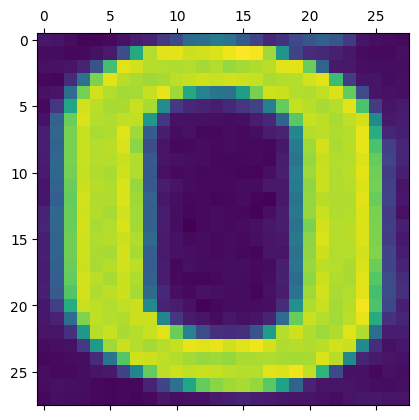

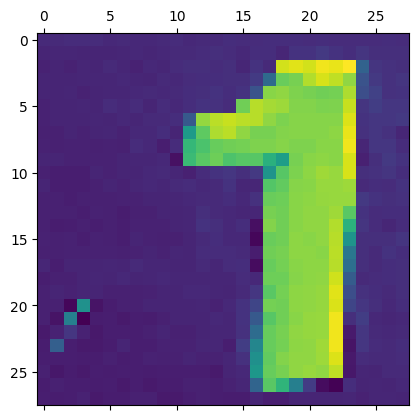

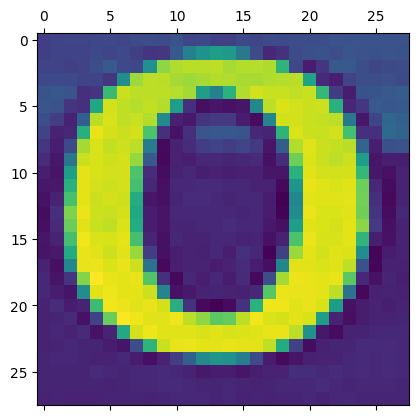

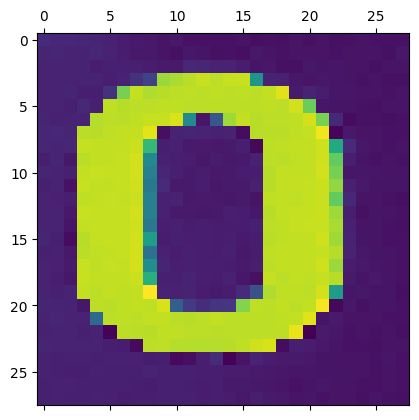

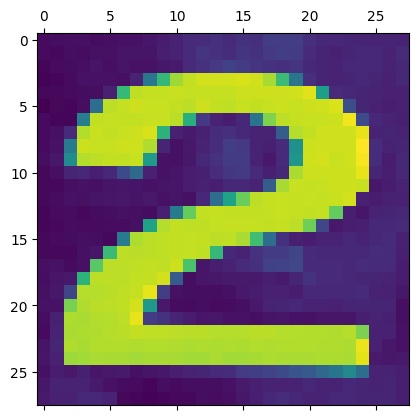

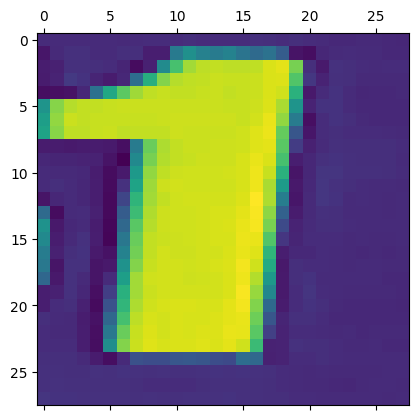

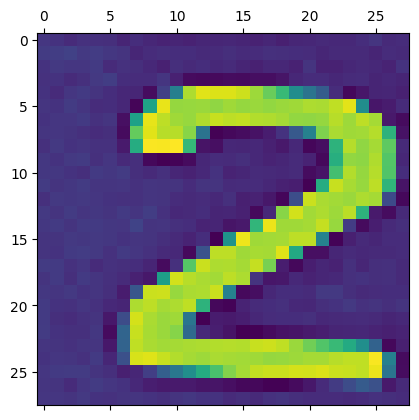

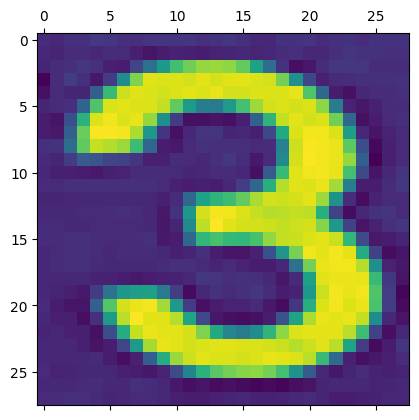

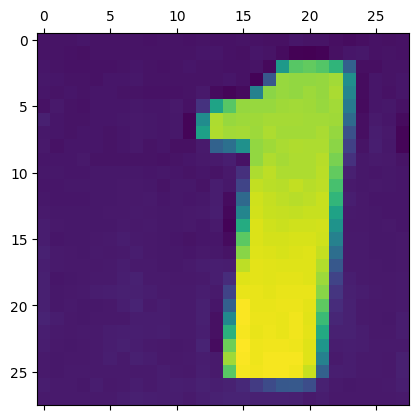

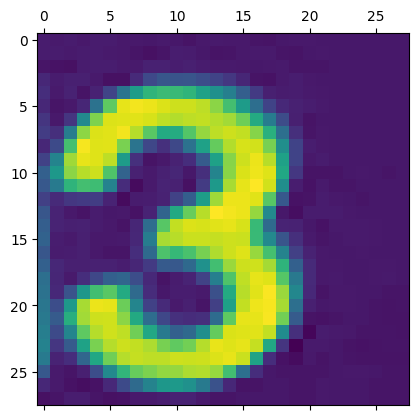

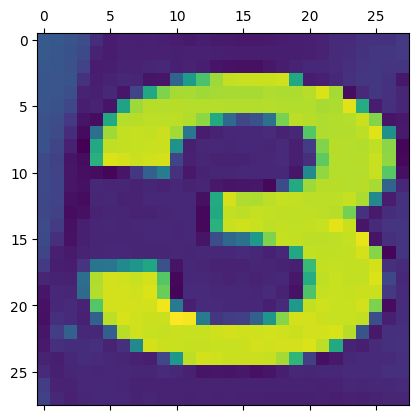

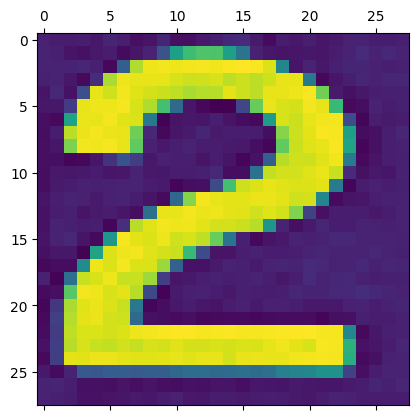

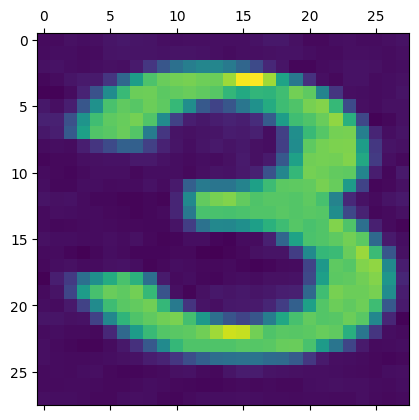

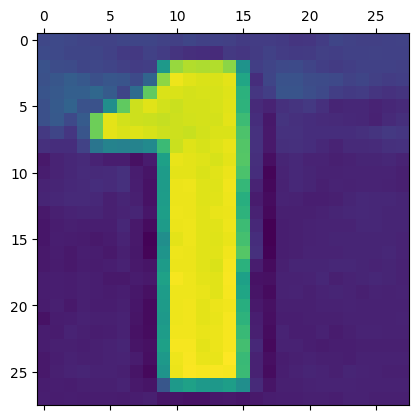

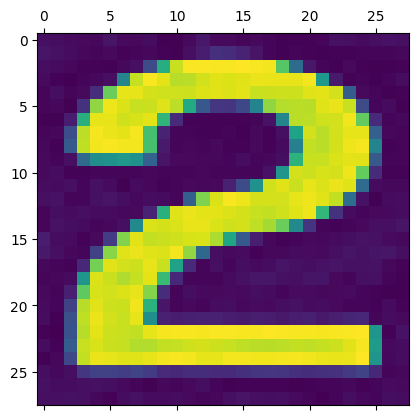

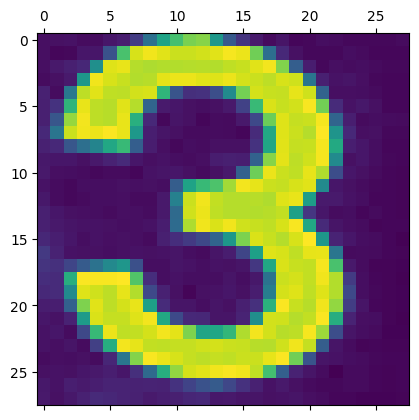

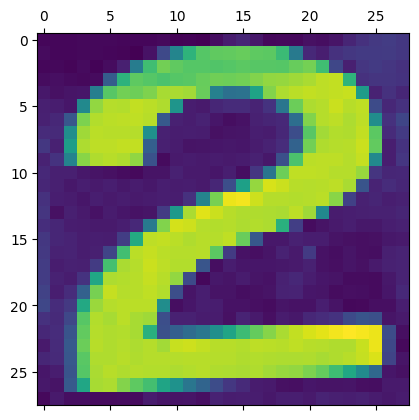

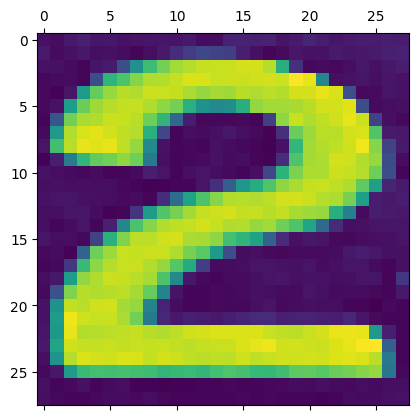

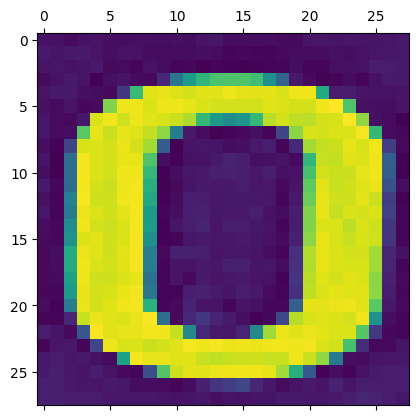

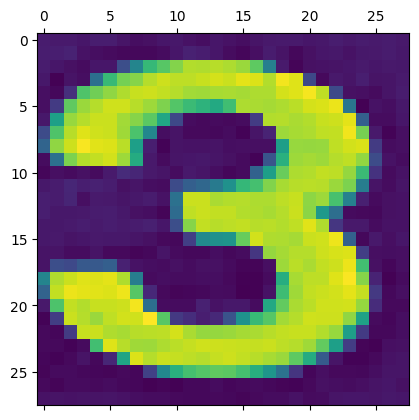

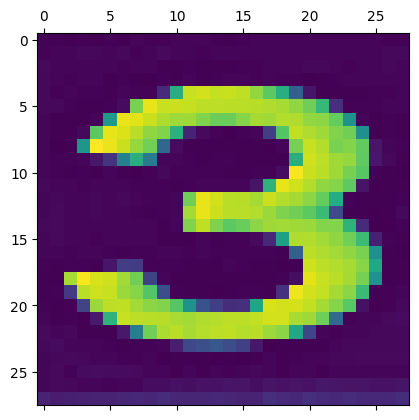

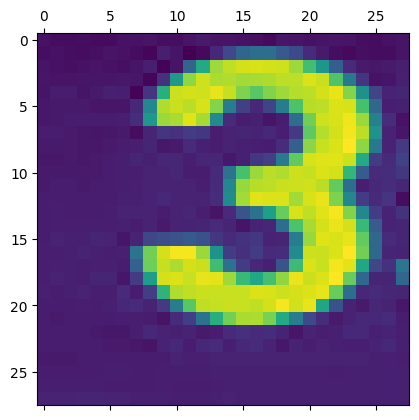

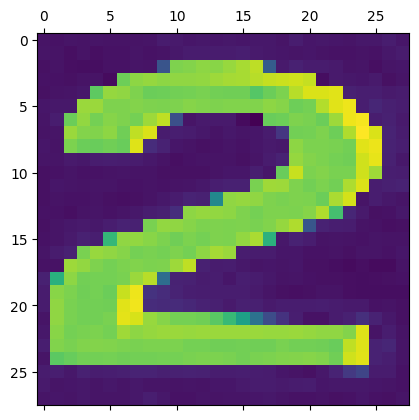

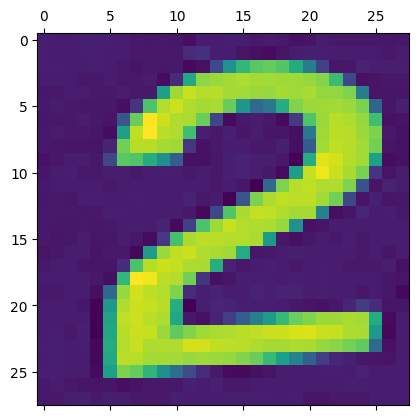

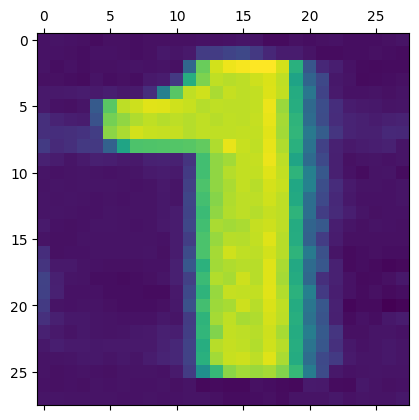

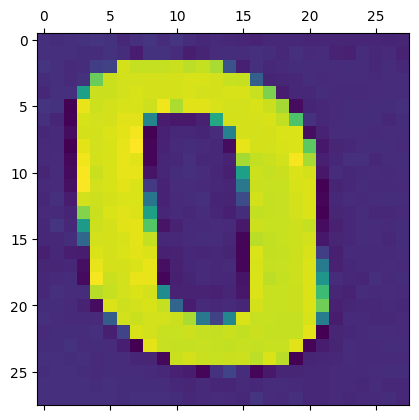

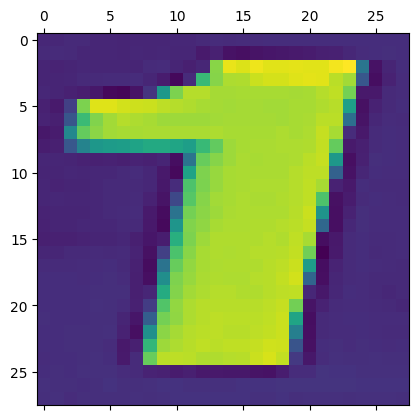

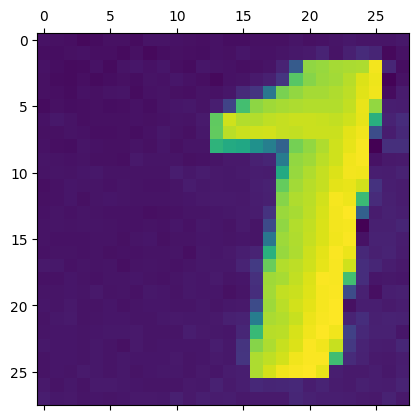

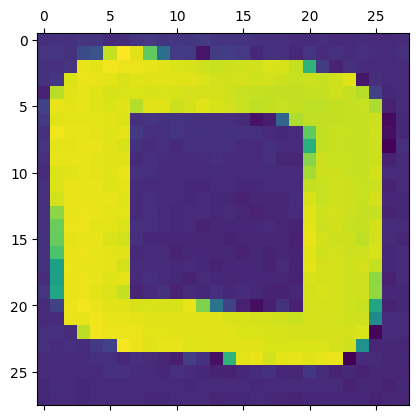

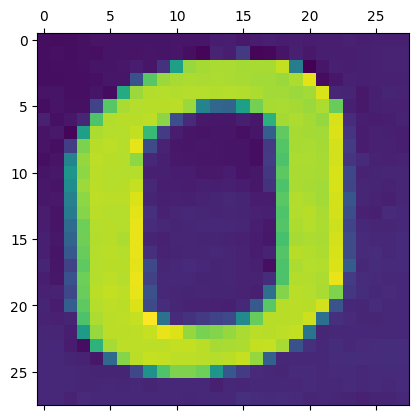

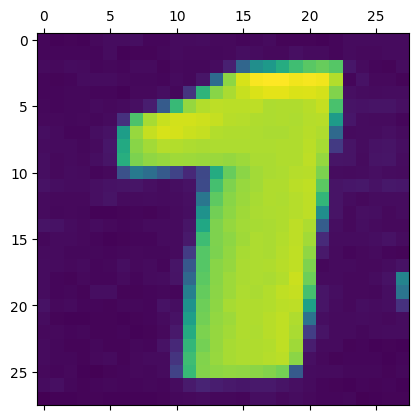

In [85]:
target_fd = "./character_image/train_case"

for name in listdir(target_fd):
    # if name.startswith("4"):
    #     targets1 = [0,0,0,0,1]

    if name.endswith("0.jpg") :
        # Read the image file using OpenCV
        targets1 = [1,0,0,0]
    elif name.endswith('1.jpg') :
        targets1 = [0,1,0,0]
    elif name.endswith('2.jpg') :
        targets1 = [0,0,1,0]
    elif name.endswith("3.jpg"):
        targets1 = [0,0,0,1]
    image =cv2.imread(os.path.join(target_fd,name))
    resized = cv2.resize(image, (28,28))
    # convert picture to gray scale
    img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    # _,img = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
    x_flattend = img_gray.reshape(1, 28*28)
    # plt.matshow(img_gray)
    x_flattend = np.squeeze(x_flattend)
    x_flattend = x_flattend/255
    inputs  = x_flattend
    plt.matshow(img_gray)


In [71]:
def Weight_Bias_Update(wkj,dwkkj, bias_k, dbkkj, wji, dwjji,bias_j,dbjii ):
    # Saving_Weights_Bias() implemented inside
    # Update Weights and Bias.
    # Calculate 𝑤𝑘𝑘𝑗+ and 𝑏𝑘𝑘𝑗+
    n = 0.5
    wkjj = wkj - n*dwkkj
    bkkj = bias_k - n*dbkkj
    # print("wk+")
    # print(wkjj)
    # print("bias_k+")
    # print(bkkj)

    # Calculate 𝑤𝑗𝑗𝑖+ and 𝑏𝑗𝑗𝑖+
    wjji = wji - n *dwjji
    bjji = bias_j - n* dbjii
    # print("wj+")
    # print(wjji)
    # print("bias_j+")
    # print(bjji)
    return wkjj,bkkj,wjji,bjji

In [72]:
# def Saving_Weights_Bias(wkjj,bkkj,wjji,bjji):
#     # Save 𝑤𝑘𝑘𝑗 and 𝑏𝑘𝑘𝑗
#     # Save 𝑤𝑗𝑗𝑖 and 𝑏𝑗𝑗𝑖


In [76]:
# wji,wkj,bias_j,bias_k,target = Weight_Initialization()
inputs= np.array([0.2,0.5])
wji= np.array([[0.1,0.2],[0.3,0.4]])
wkj= np.array([[0.5,0.6],[0.7,0.8]])
bias_j = np.array([0.2,0.2])
bias_k = np.array([0.4,0.4])
target = np.array([0.2,0.8])
# # inputs= np.array([0.5,0.8])
# # wji= np.array([[-0.8,0.2],[-0.5,-0.2],[0.4,0.4]])
# # wkj= np.array([[-0.3,0.15,0.4],[0.4,-0.5,0.1]])
# # bias_j = np.array([0.4,0.2,0.1])
# # bias_k = np.array([0.3,0.15])
# # target = np.array([0.7,0.4])
netj,outj = Forward_Input_Hidden(inputs, wji, bias_j)
netk,outk = Forward_Hidden_Output(outj, wkj, bias_k)

dwkkj,dbkkj = Weight_Bias_Correction_Output(outk,target, outj)

dwjji, dbjii = Weight_Bias_Correction_Hidden(outj,outk,inputs,target,wkj)

Weight_Bias_Update(wkj,dwkkj, bias_k, dbkkj, wji, dwjji,bias_j,dbjii)

# # Error_Correction(outk, target)

(array([[0.46994941, 0.56820185],
        [0.70072558, 0.80076778]]),
 array([0.3481282 , 0.40125246]),
 array([[0.09877858, 0.19694644],
        [0.29857089, 0.39642722]]),
 array([0.19389289, 0.19285444]))

In [75]:


OUTPUT_NEURONS = 3
INPUT_NEURONS = 28* 28
HIDDEN_NEURONS = 16
ITTERATIONS = 10
ERROR = 0.2
i= 0 
j= 0



targets1 = [1,0,0]
targets2 = [0,1,0]
targets3 = [0,0,1]

target_fd = "./character_image/0"
for name in listdir(target_fd):
    i=0 
    # for filename in os.listdir(directory):
    # if filename.endswith('.jpg'):
    #     # Read the image file using OpenCV
    #     image = cv2.imread(os.path.join(directory, filename))
    image =cv2.imread(os.path.join(target_fd,name))
    resized = cv2.resize(image, (28,28))
    # convert picture to gray scale
    img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    # _,img = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
    x_flattend = img_gray.reshape(1, 28*28)
    # plt.matshow(img_gray)
    x_flattend = np.squeeze(x_flattend)
    x_flattend = x_flattend/255
    inputs  = x_flattend
    if(j == 0):
        wji,wkj,bias_j,bias_k = Weight_Initialization()
        j+=1
    while(i < ITTERATIONS):
        netj,outj = Forward_Input_Hidden(inputs, wji, bias_j)
        netk,outk = Forward_Hidden_Output(outj, wkj, bias_k)
        dwkkj,dbkkj = Weight_Bias_Correction_Output(outk,targets1, outj)
        dwjji, dbjii = Weight_Bias_Correction_Hidden(outj,outk,inputs,targets1,wkj)
        wkjj,bkkj,wjji,bjji = Weight_Bias_Update(wkj,dwkkj, bias_k, dbkkj, wji, dwjji,bias_j,dbjii)
        wji = wjji
        wkj = wkjj
        bias_j = bjji
        bias_k = bkkj
        if(Check_for_End(outk, targets1, ERROR)):
            print(np.argmax(outk))
            break
        i+=1


targets1 = [0,1,0]
target_fd = "./character_image/1"
for name in listdir(target_fd):
    i=0 
    image =cv2.imread(os.path.join(target_fd,name))
    resized = cv2.resize(image, (28,28))
    # convert picture to gray scale
    img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    # _,img = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
    x_flattend = img_gray.reshape(1, 28*28)
    # plt.matshow(img_gray)
    x_flattend = np.squeeze(x_flattend)
    x_flattend = x_flattend/255
    inputs  = x_flattend
    while(i < ITTERATIONS):
        netj,outj = Forward_Input_Hidden(inputs, wji, bias_j)
        netk,outk = Forward_Hidden_Output(outj, wkj, bias_k)
        dwkkj,dbkkj = Weight_Bias_Correction_Output(outk,targets1, outj)
        dwjji, dbjii = Weight_Bias_Correction_Hidden(outj,outk,inputs,targets1,wkj)
        wkjj,bkkj,wjji,bjji = Weight_Bias_Update(wkj,dwkkj, bias_k, dbkkj, wji, dwjji,bias_j,dbjii)
        wji = wjji
        wkj = wkjj
        bias_j = bjji
        bias_k = bkkj
        if(Check_for_End(outk, targets1, ERROR)):
            print(np.argmax(outk))
            break
        i+=1
targets1 = [0,0,1]
target_fd = "./character_image/2"
for name in listdir(target_fd):
    i=0 
    image =cv2.imread(os.path.join(target_fd,name))
    resized = cv2.resize(image, (28,28))
    # convert picture to gray scale
    img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    # _,img = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
    x_flattend = img_gray.reshape(1, 28*28)
    # plt.matshow(img_gray)
    x_flattend = np.squeeze(x_flattend)
    x_flattend = x_flattend/255
    inputs  = x_flattend
    while(i < ITTERATIONS):
        netj,outj = Forward_Input_Hidden(inputs, wji, bias_j)
        netk,outk = Forward_Hidden_Output(outj, wkj, bias_k)
        dwkkj,dbkkj = Weight_Bias_Correction_Output(outk,targets1, outj)
        dwjji, dbjii = Weight_Bias_Correction_Hidden(outj,outk,inputs,targets1,wkj)
        wkjj,bkkj,wjji,bjji = Weight_Bias_Update(wkj,dwkkj, bias_k, dbkkj, wji, dwjji,bias_j,dbjii)
        wji = wjji
        wkj = wkjj
        bias_j = bjji
        bias_k = bkkj
        if(Check_for_End(outk, targets1, ERROR)):

            print(np.argmax(outk))
            break
        i+=1
#test
target_fd = "./character_image/test_case"
for name in listdir(target_fd):
    image =cv2.imread(os.path.join(target_fd,name))
    resized = cv2.resize(image, (28,28))
    # convert picture to gray scale
    img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    # _,img = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
    x_flattend = img_gray.reshape(1, 28*28)
    # plt.matshow(img_gray)
    x_flattend = np.squeeze(x_flattend)
    x_flattend = x_flattend/255
    inputs  = x_flattend
    netj,outj = Forward_Input_Hidden(inputs, wji, bias_j)
    netk,outk = Forward_Hidden_Output(outj, wkj, bias_k)

    print(np.argmax(outk))

# # Load image
# image = cv2.imread("character_image/9/9_01.jpg")




0.5827821233485762
0.3022459343070639
0.15267168855267113
0
0.1439532053176502
0
0.06144973709056808
0
0.05250825161267274
0
0.058245539151766335
0
0.0413001760338882
0
0.022427126947594085
0
0.02687184978836374
0
0.6523671503871924
0.48065341898251635
0.30119258466881405
0.17481796960902102
1
0.25558510223925357
0.0846116076880382
1
0.04651577585048077
1
0.059278112962773924
1
0.0932619243586889
1
0.024994375913816227
1
0.019917637004329386
1
0.015583755061560298
1
0.7595487215023271
0.6559111666051571
0.5327803912811763
0.40100137527102353
0.2709137082674801
0.17296962797869708
2
0.11872187865056613
2
0.10221418209382496
2
0.060272412162840294
2
0.055049184507679635
2
0.0417091667925115
2
0.03439233317636796
2
0.03481643844591269
2
2
2
2
2
2
2
